<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#keras의-CNN모델과-scikit-learn-연동하기" data-toc-modified-id="keras의-CNN모델과-scikit-learn-연동하기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>keras의 CNN모델과 scikit-learn 연동하기</a></span><ul class="toc-item"><li><span><a href="#KerasClassifier" data-toc-modified-id="KerasClassifier-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>KerasClassifier</a></span></li><li><span><a href="#learning_curve와-연동" data-toc-modified-id="learning_curve와-연동-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>learning_curve와 연동</a></span></li><li><span><a href="#GridSearchCV와-연동" data-toc-modified-id="GridSearchCV와-연동-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>GridSearchCV와 연동</a></span></li></ul></li></ul></div>

# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: [https://github.com/realblack0/ai_lecture_fundamental](https://github.com/realblack0/ai_lecture_fundamental)  
E-Mail: realblack0@gmail.com

## keras의 CNN모델과 scikit-learn 연동하기

### KerasClassifier

In [1]:
import tensorflow as tf

In [5]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

데이터를 가져온다.

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train = X_train/255.
X_test = X_test/255.

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

모델 만드는 함수를 만든다.

In [5]:
def build_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
    return cnn_model

`KerasClassifier`는 모델 만드는 함수를 인자로 받는다.

In [7]:
kc = KerasClassifier(build_fn=build_model)

scikit-learn에서는 `fit`할 때 무조건 2차원 데이터만 받을 수 있었다.  
keras의 wrapper 모듈을 이용하면 input에 3차원 이상의 데이터도 사용할 수 있다.

In [9]:
kc.fit(X_train, y_train)

Train on 60000 samples
60000/60000 [==============================] - 24s 397us/sample - loss: 0.2199 - acc: 0.9330


`epochs` 옵션은 인스턴스할 때 넣는 것이 좋다.  
`fit`에 넣을 수도 있지만, 인스턴스할 때 넣으면 `get_params`에 등재되어 scikit-learn의 `GridSearchCV` 같은 기능과 연동하기 좋다.

In [10]:
kc = KerasClassifier(build_model, epochs=2, verbose=2)

In [11]:
kc.fit(X_train, y_train)

Train on 60000 samples
Epoch 1/2
60000/60000 - 22s - loss: 0.2189 - acc: 0.9335
Epoch 2/2
60000/60000 - 22s - loss: 0.0651 - acc: 0.9803


### learning_curve와 연동

scikit-learn의 `learning_curve`함수와 연동된다.

In [12]:
from sklearn.model_selection import learning_curve

In [13]:
train_size, train_score, test_score = learning_curve(kc, X_train, y_train, cv=3)

Train on 4000 samples
Epoch 1/2
4000/4000 - 2s - loss: 1.1392 - acc: 0.6503
Epoch 2/2
4000/4000 - 2s - loss: 0.2948 - acc: 0.9130
20000/1 - 4s - loss: 0.2052 - acc: 0.9280
4000/1 - 1s - loss: 0.2047 - acc: 0.9392
Train on 13000 samples
Epoch 1/2
13000/13000 - 7s - loss: 0.6476 - acc: 0.8101
Epoch 2/2
13000/13000 - 5s - loss: 0.1768 - acc: 0.9465
20000/1 - 3s - loss: 0.0935 - acc: 0.9581
13000/1 - 2s - loss: 0.0592 - acc: 0.9658
Train on 22000 samples
Epoch 1/2
22000/22000 - 10s - loss: 0.4414 - acc: 0.8655
Epoch 2/2
22000/22000 - 9s - loss: 0.1310 - acc: 0.9607
20000/1 - 3s - loss: 0.0800 - acc: 0.9602
22000/1 - 3s - loss: 0.0802 - acc: 0.9674
Train on 31000 samples
Epoch 1/2
31000/31000 - 14s - loss: 0.3649 - acc: 0.8869
Epoch 2/2
31000/31000 - 13s - loss: 0.1077 - acc: 0.9661
20000/1 - 3s - loss: 0.0566 - acc: 0.9729
31000/1 - 5s - loss: 0.0496 - acc: 0.9769
Train on 40000 samples
Epoch 1/2
40000/40000 - 18s - loss: 0.3091 - acc: 0.9013
Epoch 2/2
40000/40000 - 18s - loss: 0.0910 - ac

In [14]:
from sklearn_evaluation import plot

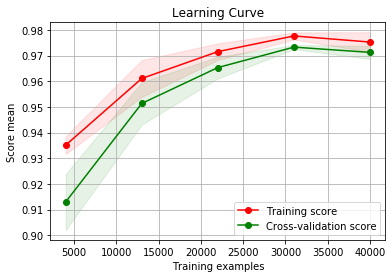

In [16]:
plot.learning_curve(train_score, test_score, train_size)

### GridSearchCV와 연동

`GridSearchCV`와 연동하기 위해서는 모델 만드는 함수에 인자가 있어야한다.  
이 인자는 반드시 default value가 있어야 한다.

In [6]:
def build_model(act="relu"):
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation=act, input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation=act),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(16, activation=act),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
    return cnn_model

In [8]:
kc = KerasClassifier(build_model, epochs=1, verbose=2)

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
# build_fn에 해당하는 함수(build_model)의 파라미터를 param_grid에 사용할 수 있다. 
kc.get_params()

{'epochs': 1,
 'verbose': 2,
 'build_fn': <function __main__.build_model(act='relu')>}

In [12]:
grid = GridSearchCV(kc, param_grid={"act":["sigmoid", "tanh", "relu"]}, cv=2)

In [15]:
grid.fit(X_train, y_train)

Train on 30000 samples
30000/30000 - 13s - loss: 1.5271 - acc: 0.5437
30000/1 - 4s - loss: 0.6954 - acc: 0.8728
Train on 30000 samples
30000/30000 - 14s - loss: 1.5345 - acc: 0.5436
30000/1 - 4s - loss: 0.6055 - acc: 0.8663
Train on 30000 samples
30000/30000 - 13s - loss: 0.4076 - acc: 0.9042
30000/1 - 5s - loss: 0.2087 - acc: 0.9565
Train on 30000 samples
30000/30000 - 15s - loss: 0.3937 - acc: 0.9046
30000/1 - 8s - loss: 0.0875 - acc: 0.9641
Train on 30000 samples
30000/30000 - 16s - loss: 0.3749 - acc: 0.8870
30000/1 - 5s - loss: 0.1306 - acc: 0.9654
Train on 30000 samples
30000/30000 - 15s - loss: 0.3127 - acc: 0.9056
30000/1 - 4s - loss: 0.0690 - acc: 0.9600
Train on 60000 samples
60000/60000 - 31s - loss: 0.2329 - acc: 0.9304


GridSearchCV(cv=2, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001D5C3DE2E10>,
             iid='deprecated', n_jobs=None,
             param_grid={'act': ['sigmoid', 'tanh', 'relu']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

역시 relu가 가장 성능이 좋다.

In [16]:
import pandas as pd

In [19]:
pd.DataFrame(grid.cv_results_).T

,0,1,2
mean_fit_time,13.5545,14.3665,15.7045
std_fit_time,0.657766,0.920204,0.473299
mean_score_time,4.47076,6.51456,4.67474
std_score_time,0.0538045,1.59549,0.274561
param_act,sigmoid,tanh,relu
params,{'act': 'sigmoid'},{'act': 'tanh'},{'act': 'relu'}
split0_test_score,0.8728,0.956467,0.965433
split1_test_score,0.8663,0.964133,0.960033
mean_test_score,0.86955,0.9603,0.962733
std_test_score,0.00325,0.00383332,0.0027
